In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
CURRENT_PATH = './UTKFace'

,age,gender,race,img_path
0,2,0,0,./UTKFace/2_0_0_20170110211504184.jpg.chip.jpg
1,33,1,1,./UTKFace/33_1_1_20170117173927950.jpg.chip.jpg
2,25,1,4,./UTKFace/25_1_4_20170117195141428.jpg.chip.jpg
3,56,0,3,./UTKFace/56_0_3_20170119180916188.jpg.chip.jpg
4,1,0,2,./UTKFace/1_0_2_20170109193535757.jpg.chip.jpg


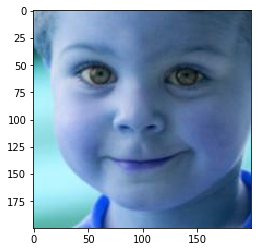

In [2]:
# 画像仕分け用データフレーム作成
img_name_list = os.listdir('UTKFace/')
age_gender_race_img_path_list = []
for img_name in img_name_list:
    split_img_name = img_name.split('_')
    if len(split_img_name) == 4:
        split_img_name[0], split_img_name[1], split_img_name[2] = int(split_img_name[0]), int(split_img_name[1]), int(split_img_name[2])
        split_img_name[3] = os.path.join(CURRENT_PATH, img_name)
        age_gender_race_img_path_list.append(split_img_name)
df = pd.DataFrame(age_gender_race_img_path_list, columns=['age', 'gender', 'race', 'img_path'])
plt.imshow(cv2.imread(df['img_path'][0]))
df.head()

In [3]:
# 年齢、性別、人種ごとの画像数表示
age_group = pd.cut(df['age'], np.arange(0, 101, 10),
           include_lowest=True, right=False,
           )
print(age_group.value_counts())

print('男性:', len(df[df['gender'] == 0]))
print('女性:', len(df[df['gender'] == 1]))

print('白人:', len(df[df['race'] == 0]))
print('黒人:', len(df[df['race'] == 1]))
print('アジア人:', len(df[df['race'] == 2]))
print('インド人:', len(df[df['race'] == 3]))
print('その他:', len(df[df['race'] == 4]))

[20, 30)     7344
[30, 40)     4536
[0, 10)      3062
[50, 60)     2299
[40, 50)     2245
[10, 20)     1531
[60, 70)     1316
[70, 80)      699
[80, 90)      504
[90, 100)     137
Name: age, dtype: int64
男性: 12391
女性: 11314
白人: 10078
黒人: 4526
アジア人: 3434
インド人: 3975
その他: 1692


In [6]:
# 年齢ごとのばらつき確認
age_range_list = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60)]
for age_range in age_range_list:
    low = age_range[0]
    high = age_range[1]
    print(f'{low} - {high}')
    age_range_data = df[(low <= df['age']) & (df['age'] < high)]
    print('all:', len(age_range_data))
    print('===========================================================')
    print('男性:', len(age_range_data[age_range_data['gender'] == 0]))
    print('女性:', len(age_range_data[age_range_data['gender'] == 1]))
    print('===========================================================')
    print('白人:', len(age_range_data[age_range_data['race'] == 0]))
    print('黒人:', len(age_range_data[age_range_data['race'] == 1]))
    print('アジア人:', len(age_range_data[age_range_data['race'] == 2]))
    print('インド人:', len(age_range_data[age_range_data['race'] == 3]))
    print('その他:', len(age_range_data[age_range_data['race'] == 4]))
    print()

10 - 20
all: 1531
男性: 681
女性: 850
白人: 943
黒人: 182
アジア人: 96
インド人: 149
その他: 161

20 - 30
all: 7344
男性: 3062
女性: 4282
白人: 1986
黒人: 1858
アジア人: 1329
インド人: 1499
その他: 672

30 - 40
all: 4536
男性: 2477
女性: 2059
白人: 1749
黒人: 1258
アジア人: 527
インド人: 722
その他: 280

40 - 50
all: 2245
男性: 1519
女性: 726
白人: 1115
黒人: 422
アジア人: 157
インド人: 431
その他: 120

50 - 60
all: 2299
男性: 1659
女性: 640
白人: 1368
黒人: 307
アジア人: 115
インド人: 452
その他: 57



In [3]:
# 年齢を10〜60歳までにする
df = df[(10 <= df['age']) & (df['age'] < 60)]

In [16]:
# 年齢ごとにフォルダを作成して元ディレクトリからコピー
import shutil
age_range_list = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60)]
for age_range in age_range_list:
    low_age = age_range[0]
    high_age = age_range[1]
    dst_dir = f'age/original_data/{low_age}_{high_age}'
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    match_img_df = df[(low_age <= df['age']) & (df['age'] < high_age)]
    img_path_list = match_img_df['img_path']
    for img_path in img_path_list:
        img_name = os.path.basename(img_path)
        shutil.copyfile(img_path, os.path.join(dst_dir, img_name))

In [17]:
# genderごとにフォルダを作成して、元ディレクトリからコピー
import shutil
gender_dict = {
    0: 'male',
    1: 'female'
}
base_dst = 'gender/original_data/'
for gender_id in gender_dict:
    dst_dir = os.path.join(base_dst, gender_dict[gender_id])
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    match_img_df = df[df['gender'] == gender_id]
    img_path_list = match_img_df['img_path']
    for img_path in img_path_list:
        img_name = os.path.basename(img_path)
        shutil.copyfile(img_path, os.path.join(dst_dir, img_name))

In [19]:
# 人種ごとにフォルダを作成して、元ディレクトリからコピー
import shutil
race_dict = {
    0: 'white',
    1: 'black',
    2: 'asian',
    3: 'indian',
    4: 'others'
}
base_dst = 'race/original_data/'
for race_id in race_dict:
    dst_dir = os.path.join(base_dst, race_dict[race_id])
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)
    match_img_df = df[df['race'] == race_id]
    img_path_list = match_img_df['img_path']
    for img_path in img_path_list:
        img_name = os.path.basename(img_path)
        shutil.copyfile(img_path, os.path.join(dst_dir, img_name))

In [4]:
import os
import shutil
import random


def image_dir_train_test_sprit(original_dir, base_dir, train_size=0.8):
    '''
    画像データをトレインデータとテストデータにシャッフルして分割します。フォルダもなければ作成します。

    parameter
    ------------
    original_dir: str
      オリジナルデータフォルダのパス その下に各クラスのフォルダがある
    base_dir: str
      分けたデータを格納するフォルダのパス　そこにフォルダが作られます
    train_size: float
      トレインデータの割合
    '''
    try:
        os.mkdir(base_dir)
    except FileExistsError:
        print(base_dir + "は作成済み")

    #クラス分のフォルダ名の取得
    dir_lists = os.listdir(original_dir)
    dir_lists = [f for f in dir_lists if os.path.isdir(os.path.join(original_dir, f))]
    original_dir_path = [os.path.join(original_dir, p) for p in dir_lists]

    num_class = len(dir_lists)

    # フォルダの作成(トレインとバリデーション)
    try:
        train_dir = os.path.join(base_dir, 'train')
        os.mkdir(train_dir)
    except FileExistsError:
        print(train_dir + "は作成済み")

    try:
        validation_dir = os.path.join(base_dir, 'validation')
        os.mkdir(validation_dir)
    except FileExistsError:
        print(validation_dir + "は作成済み")

    #クラスフォルダの作成
    train_dir_path_lists = []
    val_dir_path_lists = []
    for D in dir_lists:
        train_class_dir_path = os.path.join(train_dir, D)
        try:
            os.mkdir(train_class_dir_path)
        except FileExistsError:
            print(train_class_dir_path + "は作成済み")
        train_dir_path_lists += [train_class_dir_path]
        val_class_dir_path = os.path.join(validation_dir, D)
        try:
            os.mkdir(val_class_dir_path)
        except FileExistsError:
            print(val_class_dir_path + "は作成済み")
        val_dir_path_lists += [val_class_dir_path]


    #元データをシャッフルしたものを上で作ったフォルダにコピーします。
    #ファイル名を取得してシャッフル
    for i,path in enumerate(original_dir_path):
        files_class = os.listdir(path)
        random.shuffle(files_class)
        # 分割地点のインデックスを取得
        num_bunkatu = int(len(files_class) * train_size)
        #トレインへファイルをコピー
        for fname in files_class[:num_bunkatu]:
            src = os.path.join(path, fname)
            dst = os.path.join(train_dir_path_lists[i], fname)
            shutil.copyfile(src, dst)
        #valへファイルをコピー
        for fname in files_class[num_bunkatu:]:
            src = os.path.join(path, fname)
            dst = os.path.join(val_dir_path_lists[i], fname)
            shutil.copyfile(src, dst)
        print(path + "コピー完了")

    print("分割終了")


In [5]:
# 年齢データを訓練データとテストデータに分ける
original_dir = 'age/split_data/train/'
dst_dir = 'age/train_valid'

image_dir_train_test_sprit(original_dir, dst_dir)

age/split_data/train/10_20コピー完了
age/split_data/train/50_60コピー完了
age/split_data/train/40_50コピー完了
age/split_data/train/20_30コピー完了
age/split_data/train/30_40コピー完了
分割終了


In [6]:
# 性別データを訓練データとテストデータに分ける
original_dir = 'gender/train_base/'
dst_dir = 'gender/train_valid'

image_dir_train_test_sprit(original_dir, dst_dir)

gender/train_base/femaleコピー完了
gender/train_base/maleコピー完了
分割終了


In [7]:
# 人種データを訓練データとテストデータに分ける
original_dir = 'race/train_base/'
dst_dir = 'race/train_valid'

image_dir_train_test_sprit(original_dir, dst_dir)

race/train_base/indianコピー完了
race/train_base/blackコピー完了
race/train_base/asianコピー完了
race/train_base/othersコピー完了
race/train_base/whiteコピー完了
分割終了


,age,gender,race,img_path
1,33,1,1,./UTKFace/33_1_1_20170117173927950.jpg.chip.jpg
2,25,1,4,./UTKFace/25_1_4_20170117195141428.jpg.chip.jpg
3,56,0,3,./UTKFace/56_0_3_20170119180916188.jpg.chip.jpg
5,55,0,2,./UTKFace/55_0_2_20170116172931526.jpg.chip.jpg
6,55,0,1,./UTKFace/55_0_1_20170117173626521.jpg.chip.jpg


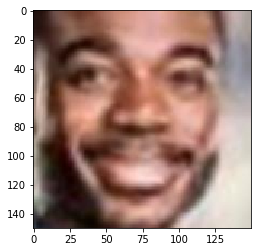

In [23]:
img = plt.imread(df['img_path'][1])
img = cv2.resize(img, (150, 150))
plt.imshow(img)
df.head()